In [1]:
# Bibliotecas base
import pandas as pd
import matplotlib.pyplot as plt

# Tratamento de dados
from sklearn.preprocessing import LabelEncoder

# Modelos para treinamento
from sklearn.naive_bayes import CategoricalNB

# Avaliacao de modelos
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Carregar o dataset

In [2]:
# Dados da tabela
data = [
    ('Dia', 'Aparência', 'Temperatura', 'Umidade', 'Ventando', 'Jogar'),
    ('d1', 'sol', 'quente', 'alta', 'nao', 'nao'),
    ('d2', 'sol', 'quente', 'alta', 'sim', 'nao'),
    ('d3', 'nublado', 'quente', 'alta', 'nao', 'sim'),
    ('d4', 'chuva', 'agradavel', 'alta', 'nao', 'sim'),
    ('d5', 'chuva', 'fria', 'normal', 'nao', 'sim'),
    ('d6', 'chuva', 'fria', 'normal', 'sim', 'nao'),
    ('d7', 'nublado', 'fria', 'normal', 'sim', 'sim'),
    ('d8', 'sol', 'agradavel', 'alta', 'nao', 'nao'),
    ('d9', 'sol', 'fria', 'normal', 'nao', 'sim'),
    ('d10', 'chuva', 'agradavel', 'normal', 'nao', 'sim'),
    ('d11', 'sol', 'agradavel', 'normal', 'sim', 'sim'),
    ('d12', 'nublado', 'agradavel', 'alta', 'sim', 'sim'),
    ('d13', 'nublado', 'quente', 'normal', 'nao', 'sim'),
    ('d14', 'chuva', 'agradavel', 'alta', 'sim', 'nao')
]

# Criando o DataFrame
df = pd.DataFrame(data[1:], columns=data[0])
df.head()

,Dia,Aparência,Temperatura,Umidade,Ventando,Jogar
0,d1,sol,quente,alta,nao,nao
1,d2,sol,quente,alta,sim,nao
2,d3,nublado,quente,alta,nao,sim
3,d4,chuva,agradavel,alta,nao,sim
4,d5,chuva,fria,normal,nao,sim


# Tratamento dos dados

In [3]:
# Criando os encoders para cada coluna
encoders = {
    'Aparência': LabelEncoder(),
    'Temperatura': LabelEncoder(),
    'Umidade': LabelEncoder(),
    'Ventando': LabelEncoder(),
    'Jogar': LabelEncoder()
}

# Codificando as colunas categóricas
for col, encoder in encoders.items():
    df[col] = encoder.fit_transform(df[col])

df_encoded = df.drop(columns=['Dia'])  # Removendo a coluna 'Dia' pois não é necessária para o treinamento
df_encoded.head()

,Aparência,Temperatura,Umidade,Ventando,Jogar
0,2,2,0,0,0
1,2,2,0,1,0
2,1,2,0,0,1
3,0,0,0,0,1
4,0,1,1,0,1


# Naive Bayes

In [4]:
# Separando as features e o target
X = df_encoded.drop(columns=['Jogar'])
y = df_encoded['Jogar']

# Criando e treinando o modelo
model = CategoricalNB()
model.fit(X, y)

CategoricalNB()

# Teste com nova instancia

In [5]:
# Dados da nova instância
new_instance = {
    'Aparência': 'chuva',
    'Temperatura': 'fria',
    'Umidade': 'normal',
    'Ventando': 'sim'
}

# Codificando os valores da nova instância
encoded_instance = {col: encoders[col].transform([value])[0] for col, value in new_instance.items()}

# Convertendo em DataFrame para fazer a previsão
encoded_instance_df = pd.DataFrame([encoded_instance])

# Fazendo a previsão
prediction = model.predict(encoded_instance_df)

# Decodificando a previsão para retornar se vai jogar ou não
decoded_prediction = encoders['Jogar'].inverse_transform(prediction)[0]
probabilities = model.predict_proba(encoded_instance_df)

# Mostrando as probabilidades
print(f"Resultado do treinamento = {decoded_prediction}")
print(f"Probabilidade de 'Não': {probabilities[0][0]*100:.2f}%")
print(f"Probabilidade de 'Sim': {probabilities[0][1]*100:.2f}%")

Resultado do treinamento = sim
Probabilidade de 'Não': 24.85%
Probabilidade de 'Sim': 75.15%


# Validacao do modelo

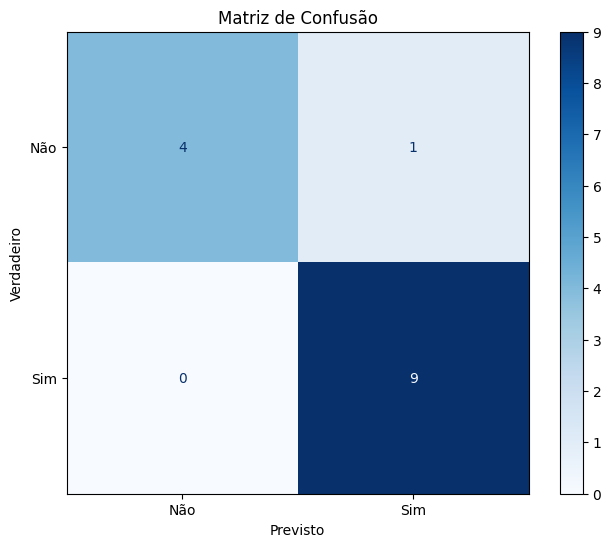

,precision,recall,f1-score,support
Não,1.00,0.80,0.89,5.00
Sim,0.90,1.00,0.95,9.00
accuracy,0.93,0.93,0.93,0.93
macro avg,0.95,0.90,0.92,14.00
weighted avg,0.94,0.93,0.93,14.00


In [6]:
# Fazendo as previsões para todo o conjunto de dados
y_pred = model.predict(X)

# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y, y_pred)
bagging_report = classification_report(y, y_pred, output_dict=True, target_names=['Não', 'Sim'])

# Matriz de confusao
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Não', 'Sim'])
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

# Report
bagging_report = pd.DataFrame(bagging_report).transpose()
bagging_report.round(2)